In [1]:
#importando todas as bibliotecas necessárias no projeto


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

In [2]:
os.getcwd()

'/Users/thiagorolemberg/Documents/ambiente_trabalho/professor/FIAP/data_science'

In [5]:
df_dados = pd.read_csv("dataset/Advertising.csv")

In [9]:
#verificando a estrutura dos dados importados: são 200 linhas e 5 colunas
print(df_dados.shape)

(200, 5)


In [10]:
#verificando o conteúdo das peimeiras linhas do dataset
df_dados.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
print(df_dados.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [13]:
df_dados.drop(['Unnamed: 0'], axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


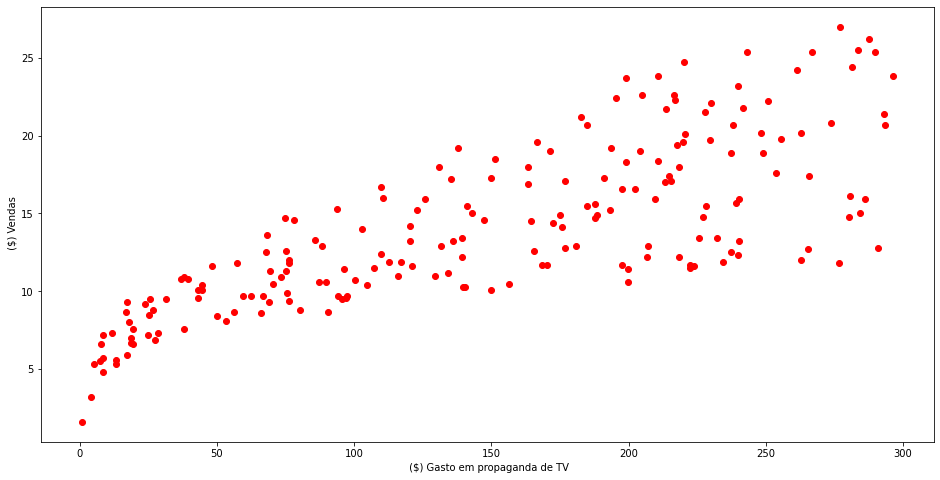

In [15]:
#regressao simples
plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'], 
    df_dados['Sales'], 
    c='red')
plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [17]:
X = df_dados['TV'].values.reshape(-1,1)
y = df_dados['Sales'].values.reshape(-1,1)

In [18]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [19]:
print("O modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Vendas = 7.0326 + 0.047537X


In [20]:
f_previsaoes = reg.predict(X)

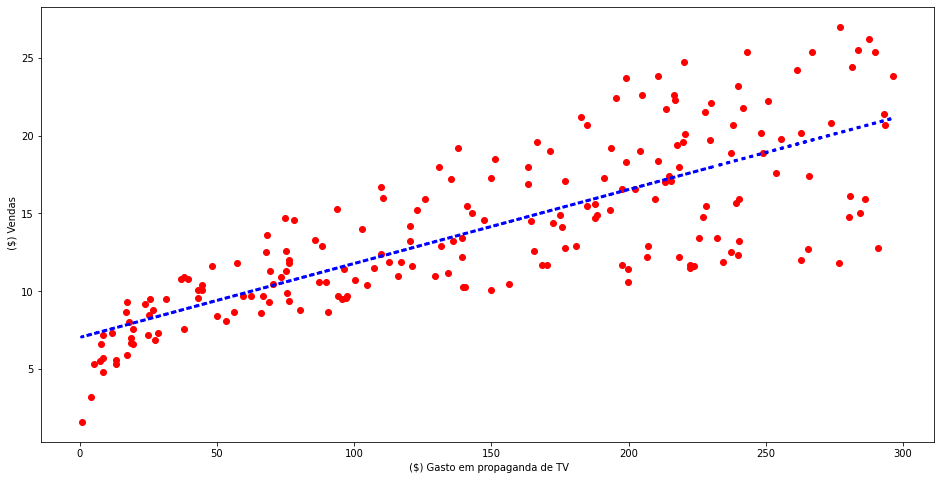

In [24]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'], 
    df_dados['Sales'], 
    c='red')

plt.plot(
    df_dados['TV'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [26]:
#Avaliando a precisão do modelo:
X = df_dados['TV']
y = df_dados['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        23:59:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0